In [6]:
# Modules 
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Load the data and clean a bit
train_df = pd.read_csv("../data/train.csv", sep=",")
test_df = pd.read_csv("../data/test.csv", sep=",")
train_df["test"] = 0
test_df["test"] = 1
test_df["price_doc"] = 0
full_df = pd.concat([train_df, test_df], axis=0)
print(full_df.shape)

# Binary categorical columns encoding :
full_df["water_1line"] = full_df["water_1line"].apply(lambda el: 1 if el == "yes" else 0)
full_df["big_market_raion"] = full_df["big_market_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["big_road1_1line"] = full_df["big_road1_1line"].apply(lambda el: 1 if el == "yes" else 0)
full_df["culture_objects_top_25"] = full_df["culture_objects_top_25"].apply(lambda el: 1 if el == "yes" else 0)
full_df["detention_facility_raion"] = full_df["detention_facility_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["incineration_raion"] = full_df["incineration_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["detention_facility_raion"] = full_df["detention_facility_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["nuclear_reactor_raion"] = full_df["nuclear_reactor_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["oil_chemistry_raion"] = full_df["oil_chemistry_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["radiation_raion"] = full_df["radiation_raion"].apply(lambda el: 1 if el == "yes" else 0)
full_df["railroad_1line"] = full_df["railroad_1line"].apply(lambda el: 1 if el == "yes" else 0)
full_df["thermal_power_plant_raion"] = full_df["thermal_power_plant_raion"].apply(lambda el: 1 if el == "yes" else 0)

(38133, 293)


<h3> Price_Doc study </h3> <br/>
1 Euro = 62.4343307 Russian rubles <br/>
mean     7.123035e+06 <br/>
std      4.780111e+06 <br/>
min      1.000000e+05 <br/>
25%      4.740002e+06 <br/>
50%      6.274411e+06 <br/>
75%      8.300000e+06 <br/>
max      1.111111e+08 <br/>

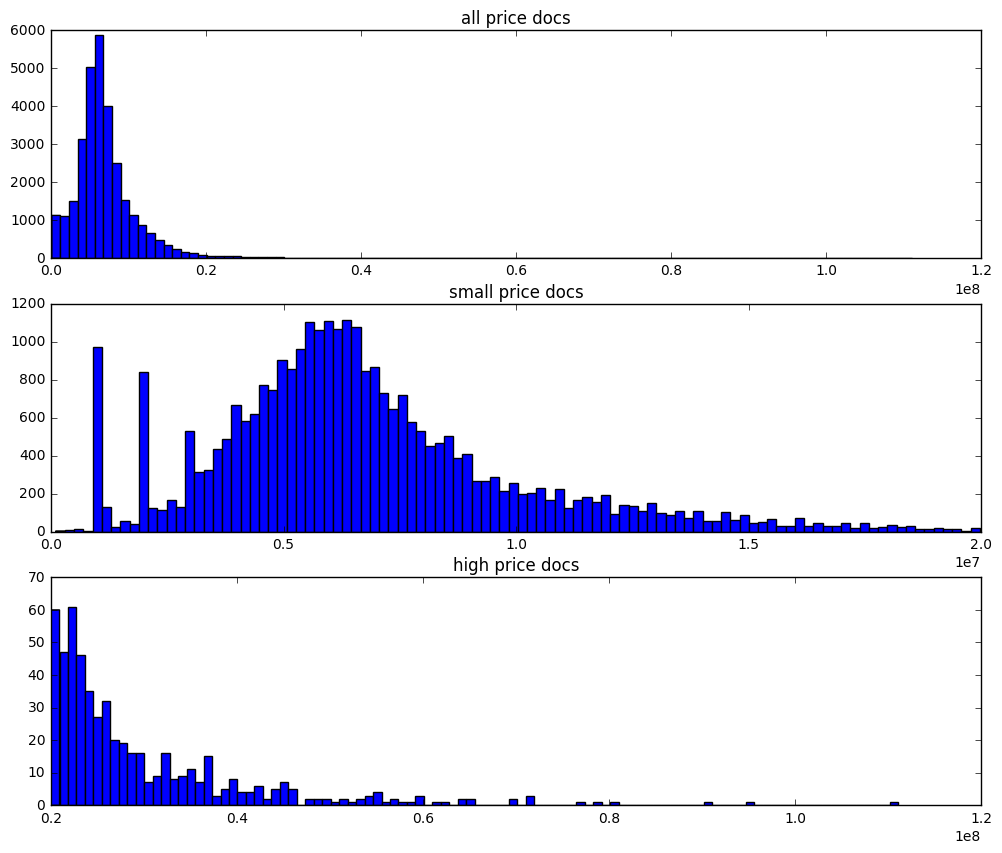

In [59]:
# look at variable price_doc
price_doc = full_df[full_df["test"] == 0]["price_doc"]
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(price_doc, bins=100)
ax1.set_title("all price docs")
ax2.hist(price_doc[price_doc < 20000000], bins=100)
ax2.set_title("small price docs")
ax3.hist(price_doc[price_doc >= 20000000], bins=100)
ax3.set_title("high price docs")
plt.show()

<h3> Full_seq and life_seq <h3>

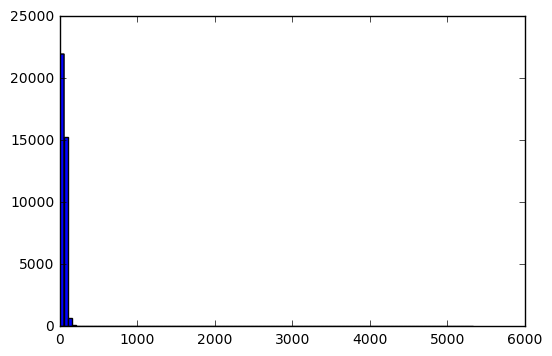

In [60]:
sq_df = full_df[["full_sq", "life_sq", "price_doc"]]
full_sq = full_df["full_sq"].dropna()
plt.hist(full_sq, bins = 100)
plt.show()

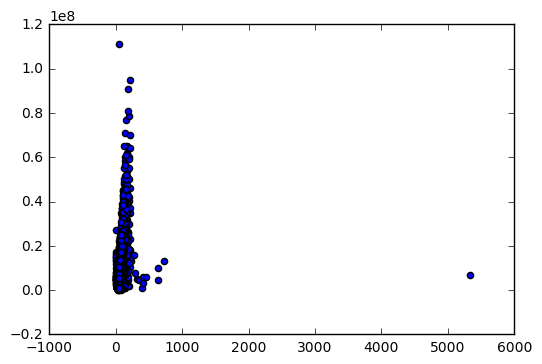

In [61]:
sq_df = sq_df.dropna()
#sq_df = sq_df[sq_df["life_sq"] <= 2000]
sq_df = sq_df[sq_df["price_doc"] > 10.0]
plt.scatter(sq_df["full_sq"], sq_df["price_doc"])
plt.show()

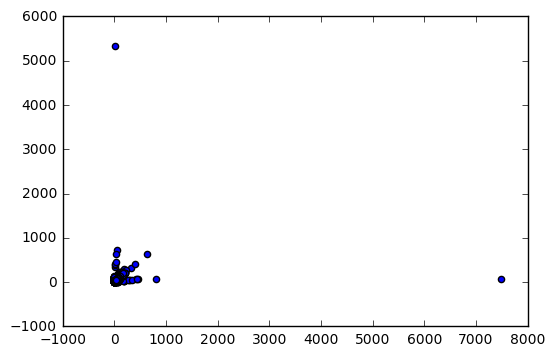

In [62]:
plt.scatter(sq_df["life_sq"], sq_df["full_sq"])
plt.show()

In [67]:
print(full_df[full_df["full_sq"] >= 5000]["id"])
print(full_df[full_df["life_sq"] >= 5000]["id"])

3527    3530
Name: id, dtype: int64
13546    13549
Name: id, dtype: int64


In [66]:
full_df.tail()

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,water_km,water_treatment_km,work_all,work_female,work_male,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km
7657,14528,6663,7865,19439,9041,10398,7517,3455,4062,24753,...,0.219356,8.841655,100062,44606,55456,3.152444,16468,7617,8851,13.988172
7658,1755,849,906,2243,1078,1165,953,459,495,4923,...,0.215268,9.211348,8910,4203,4707,13.611344,1991,962,1030,30.195354
7659,9955,5120,4835,12508,6443,6065,4237,2158,2079,23480,...,0.524839,10.378040,43921,22020,21901,1.091507,11272,5802,5470,4.060430
7660,11923,5781,6142,14976,7306,7670,5594,2718,2876,28334,...,1.394677,5.611768,104635,54316,50319,1.795903,13595,6597,6998,17.433375
7661,12093,6721,5372,14552,7962,6590,4720,2399,2321,27006,...,0.800876,4.922175,73503,39483,34020,0.498553,13326,7340,5986,12.410939


In [68]:
full_df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe', 'Lefortovo',
       "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo", 'Vnukovo',
       'Juzhnoe Tushino', 'Severnoe Tushino', "Chertanovo Central'noe",
       'Fili Davydkovo', 'Otradnoe', 'Novo-Peredelkino', 'Bogorodskoe',
       'Jaroslavskoe', 'Strogino', 'Hovrino', "Moskvorech'e-Saburovo",
       'Staroe Krjukovo', 'Ljublino', 'Caricyno', 'Veshnjaki',
       'Danilovskoe', 'Preobrazhenskoe', "Kon'kovo", 'Brateevo',
       'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino', 'Donskoe',
       'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino', 'Izmajlovo',
       'Severnoe Medvedkovo', 'Rostokino', 'Orehovo-Borisovo Severnoe',
       'Ochakovo-Matveevskoe', 'Taganskoe', 'Dmitrovskoe',
       'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan', 'Babushkinskoe',
       'Pokrovskoe Streshnevo', 'Obruc

In [69]:
full_df.timestamp.unique()

array(['2011-08-20', '2011-08-23', '2011-08-27', ..., '2016-05-26',
       '2016-05-28', '2016-05-30'], dtype=object)